In [13]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# load data
dataset = pd.read_csv('/mnt/sda1/final_darknet_data.csv')

In [3]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.drop(['Protocol'],axis=1,inplace=True)
dataset

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Application Type
0,86,3,0,77,0,46,0,25.666667,23.459184,0,...,0,359,0,1,32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,audio-streaming
1,733,1,1,44,489,44,44,44.554987,0.000000,489,...,244,0,0,0,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,audio-streaming
2,738,1,1,34,216,34,34,34.000000,0.000000,216,...,108,0,0,0,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,audio-streaming
3,112717347,1348,2199,671929,2316182,1087,0,181.952451,260.995069,1423,...,809,65535,65535,615,20,1.456330e+15,3.426937e+07,1.456330e+15,1.456330e+15,audio-streaming
4,115647024,22,26,2661,6948,1338,0,120.954545,290.592904,1338,...,144,29200,405,10,32,1.429050e+15,2.689988e+07,1.429050e+15,1.429050e+15,audio-streaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119996507,4546,3800,801421,1907083,1420,0,179.858949,353.638081,1305,...,227,65535,65535,1061,20,1.437760e+15,3.458096e+07,1.437760e+15,1.437760e+15,voip
239996,119996102,5993,6000,497461,498000,83,83,83.000000,0.000000,83,...,41,0,0,5992,8,1.432310e+15,3.463657e+07,1.432310e+15,1.432310e+15,voip
239997,119989434,3474,4448,1717062,1003261,1460,0,493.143974,183.326521,1420,...,126,65535,65535,3119,20,1.438010e+15,3.463632e+07,1.438010e+15,1.438010e+15,voip
239998,84639454,40,0,2019,0,50,50,50.000000,0.000000,0,...,0,0,0,39,8,1.432310e+15,2.399674e+07,1.432310e+15,1.432310e+15,voip


In [6]:
le = LabelEncoder()
y = le.fit_transform(dataset['Application Type'])

In [7]:
dataset.drop(['Application Type'],axis=1,inplace=True)

In [8]:
# split data into X and y
X = dataset

In [10]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
model = XGBClassifier(objective='multi:softmax', num_class=8)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=8, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
false_negatives = np.sum(np.logical_and(y_pred == 0, y_test == 1))
false_positives = np.sum(np.logical_and(y_pred == 1, y_test == 0))
true_negatives = np.sum(np.logical_and(y_pred == 0, y_test == 0))
true_positives = np.sum(np.logical_and(y_pred == 1, y_test == 1))
mean_absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)

print(f"Accuracy: {accuracy} F1: {f1} Recall: {recall} Precision: {precision} AUC: {0} False Negatives: {false_negatives} False Positives: {false_positives} True Negatives: {true_negatives} True Positives: {true_positives} Mean Absolute Error: {mean_absolute_error} Mean Squared Error: {mean_squared_error}")

Accuracy: 0.9469791666666667 F1: 0.9471270063197645 Recall: 0.9469791666666667 Precision: 0.9481032428315299 AUC: 0 False Negatives: 6 False Positives: 40 True Negatives: 5865 True Positives: 5498 Mean Absolute Error: 0.16158333333333333 Mean Squared Error: 0.6067916666666666


In [15]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [16]:
perf_measure(y_test, y_pred)

(5498, 896, 5865, 69)

In [17]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [18]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=y_pred, 
    y_score=model.predict_proba(X_test))

print(report_with_auc)

             precision    recall  f1-score  support     pred       AUC
0             0.988372  0.963687  0.975874   6086.0   5934.0  0.998623
1             0.859869  0.938706  0.897559   5857.0   6394.0  0.995562
2             0.981759  0.961409  0.971477   5934.0   5811.0  0.999106
3             0.966839  0.987281  0.976953   6054.0   6182.0  0.999575
4             0.930183  0.866289  0.897099   5998.0   5586.0  0.993489
5             0.968518  0.954516  0.961466   6156.0   6067.0  0.999220
6             0.903942  0.919629  0.911718   5935.0   6038.0  0.996011
7             0.981964  0.983278  0.982620   5980.0   5988.0  0.999803
avg / total   0.948103  0.946979  0.947127  48000.0  48000.0  0.998329


In [19]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

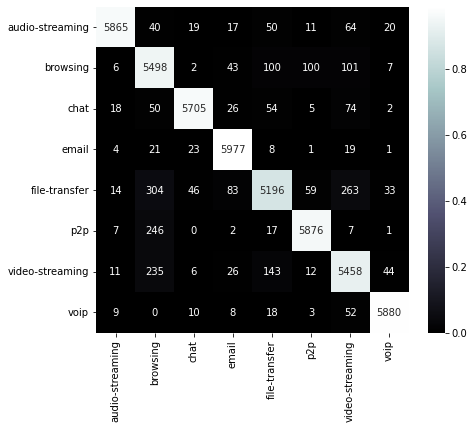

In [20]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=le.classes_)
